In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import json
from matplotlib import pyplot as plt

In [27]:
#Paths
parent_folder = 'C:/Users/Aidan/Documents/Winter_2023/BE177B/Code/wonglab-capstone/'
# img_folder = parent_folder+'Datateam/Artificial_imset/'
# paths_folder = parent_folder+'Datateam/ArtificialImgPaths.csv'
art_json = parent_folder+'Datateam/Artificial_imset/artificial_kymographs.json'
exp_json = parent_folder+'Datateam/imset1/experimental_kymograph.json'

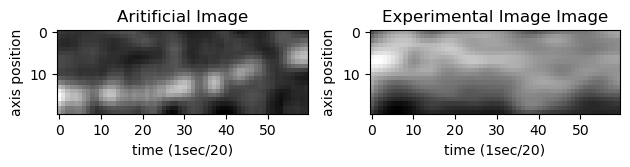

In [55]:
#Load the artificial, experimental kymographs
#This consumes a non-trivial amount of memory, so comment out when actually training the model

with open(art_json, 'r') as f:
  art_kymo = np.asarray(json.loads(f.read())["kymoset"])

with open(exp_json, 'r') as f:
  exp_kymo = np.asarray(json.loads(f.read()))

#Plot to ensure correct loading
plt.subplot(1,2,1)
plt.title('Aritificial Image')
plt.xlabel('time (1sec/20)')
plt.ylabel('axis position')
plt.imshow(art_kymo[0,:,:], cmap='gray', interpolation='nearest')

plt.subplot(1,2,2)
plt.title('Experimental Image Image')
plt.xlabel('time (1sec/20)')
plt.ylabel('axis position')
#note that the artificial indicies are position[0] while experimental are position[2]
plt.imshow(exp_kymo[:,:,0], cmap='gray', interpolation='nearest')

plt.tight_layout()
plt.show()

In [67]:
class ArtKymoDataset(Dataset):
    def __init__(self):
        #data loading
        with open(art_json, 'r') as f:
            kymos = np.asarray(json.loads(f.read())["kymoset"])

        self.x = torch.from_numpy(kymos)
        self.n_samples = kymos.shape[0]

    def __getitem__(self, index):
        return self.x[index,:,:]

    def __len__(self):
        return self.n_samples

In [73]:
class ExpKymoDataset(Dataset):
    def __init__(self):
        #data loading
        with open(exp_json, 'r') as f:
            kymos = np.asarray(json.loads(f.read()))

        self.x = torch.from_numpy(kymos)
        self.n_samples = kymos.shape[2]

    def __getitem__(self, index):
        return self.x[:,:,index]

    def __len__(self):
        return self.n_samples

In [72]:
#Dataloader test for arificial dataset

batch_size = 5
dataset = ArtKymoDataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
print(ArtKymoDataset.__len__(dataset))

dataiter = iter(dataloader)
data = dataiter._next_data()

#display first batch!
print(len(data))

#training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)

for epoch in range(num_epochs):
    for i, inputs in enumerate(dataloader):
        #forward, backward, update
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}') #summary for debugging

300
5
epoch 1/2, step 5/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 10/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 15/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 20/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 25/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 30/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 35/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 40/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 45/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 50/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 55/60, inputs torch.Size([5, 20, 60])
epoch 1/2, step 60/60, inputs torch.Size([5, 20, 60])
epoch 2/2, step 5/60, inputs torch.Size([5, 20, 60])
epoch 2/2, step 10/60, inputs torch.Size([5, 20, 60])
epoch 2/2, step 15/60, inputs torch.Size([5, 20, 60])
epoch 2/2, step 20/60, inputs torch.Size([5, 20, 60])
epoch 2/2, step 25/60, inputs torch.Size([5, 20, 60])
epoch 2/2, step 30/60, inputs torch.Size([5, 20, 60])
epoch 2/2, step 35/60, i

In [74]:
#Dataloader test for experimental dataset

batch_size = 5
dataset = ExpKymoDataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
print(ExpKymoDataset.__len__(dataset))

dataiter = iter(dataloader)
data = dataiter._next_data()

#display first batch!
print(len(data))

#training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)

for epoch in range(num_epochs):
    for i, inputs in enumerate(dataloader):
        #forward, backward, update
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}') #summary for debugging

112
5
epoch 1/2, step 5/23, inputs torch.Size([5, 20, 60])
epoch 1/2, step 10/23, inputs torch.Size([5, 20, 60])
epoch 1/2, step 15/23, inputs torch.Size([5, 20, 60])
epoch 1/2, step 20/23, inputs torch.Size([5, 20, 60])
epoch 2/2, step 5/23, inputs torch.Size([5, 20, 60])
epoch 2/2, step 10/23, inputs torch.Size([5, 20, 60])
epoch 2/2, step 15/23, inputs torch.Size([5, 20, 60])
epoch 2/2, step 20/23, inputs torch.Size([5, 20, 60])
